# Desafío - Estimando curvas normales

## 1. Importe un csv

* Utilice la base de datos de un compañero creada en la sesión pasada

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('subsample_JFGP_demo.csv')
df.head()

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,48,0.923,DNK,WesternDem,37406.762,5.627,1.9,4.812749,8.62711,89.817459
1,129,NaN,MHL,Pacific,2833.970,0.054,NaN,NaN,NaN,64.461304
2,10,0.790,BHS,Caribbean,21672.029,0.356,5.0,NaN,NaN,NaN
3,155,0.924,SGP,SouthEastAsia,54268.148,5.470,3.3,5.797279,2.91579,NaN
4,148,NaN,SMR,WesternDem,42664.211,0.034,NaN,NaN,2.38373,NaN


In [3]:
my_df = pd.read_csv('subsample_LAPP_demo.csv')
my_df.head()

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
0,133,0.515,PNG,Pacific,1693.540,6.880000,NaN,0.88,NaN,4.263571
1,190,0.769,VEN,LatAm,10513.960,NaN,13.100000,6.47,NaN,5.256702
2,34,0.394,TCD,SubSaharian,1651.050,NaN,89.400002,0.64,NaN,3.621164
3,123,0.913,NZL,WesternDem,26481.369,4.555000,4.700000,9.07,17.6,11.029610
4,88,0.550,KEN,SubSaharian,1494.630,40.700001,48.700001,1.84,13.6,5.720291


## 2. Importe su conjunto de funciones

* Genere un archivo ```ancilliary_funcs.py``` para guardar las funciones creadas en la sesión pasada e impórtelo.

* Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de su compañero.

In [4]:
import ancilliary_funcs

In [5]:
ancilliary_funcs.desafio_3(df, 'imf_pop', False)

(21, 0.21649484536082475)

In [6]:
basic_columns = ['undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc', 'imf_pop']

In [7]:
partner_group_columns =  ['ffp_hf', 'wef_qes', 'wdi_expedu', 'wdi_ners']

In [8]:
partner_columns = basic_columns + partner_group_columns
partner_columns

['undp_hdi',
 'ccodealp',
 'ht_region',
 'gle_cgdpc',
 'imf_pop',
 'ffp_hf',
 'wef_qes',
 'wdi_expedu',
 'wdi_ners']

In [9]:
for variable in partner_columns:
    print(variable)
    print(ancilliary_funcs.desafio_3(df, variable, False))

undp_hdi
(6, 0.061855670103092786)
ccodealp
(0, 0.0)
ht_region
(0, 0.0)
gle_cgdpc
(1, 0.010309278350515464)
imf_pop
(21, 0.21649484536082475)
ffp_hf
(9, 0.09278350515463918)
wef_qes
(24, 0.24742268041237114)
wdi_expedu
(22, 0.2268041237113402)
wdi_ners
(31, 0.31958762886597936)


Las 3 variables con menor cantidad de casos perdidos para mi compañero José Gomez fueron:
* ```gle_cgdpc```: con un porcentaje de 0.010309278350515464
* ```ffp_hf```: con un porcentaje de 0.09278350515463918
* ```imf_pop```: con un porcentaje de 0.21649484536082475

## 3. Estime el puntaje Z

Estime el puntaze Z para las 10 primeras y últimas observaciones de las variables con una menor cantidad de datos perdidos

* Genere una nueva columna en la tabla de datos mediante funciones vectorizadas.   Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula: $Z_i=\frac{ \left(X_i - \mu\right) }{\sigma}$.
* Para ordenar los valores pueden utilzar la función ```sort_values``` del DataFrame analizado.
	Lean la documentación asociada al argumento by.   Para evitar conflictos en la sobreescritura.
* Asegúrense de eliminar las observaciones que tengan valores perdidos con dropna.   Lean la documentación asociada al método ```subset```.
* Seleccionen las primeras y últimas 10 observaciones de la base reordenada.
	¿Qué características en común se encuentran?

In [10]:
def get_zscore(df, col):
    get_point = df[col]
    preproc = df[col].dropna()
    get_mean = preproc.mean()
    get_std = preproc.std()
    return (get_point - get_mean) / get_std

In [11]:
get_zscore(df, 'gle_cgdpc').head(10)

0    1.270988
1   -0.697460
2    0.375110
3    2.231014
4    1.570328
5   -0.747345
6   -0.756521
7   -0.771817
8   -0.840359
9   -0.775570
Name: gle_cgdpc, dtype: float64

In [12]:
get_zscore(df, 'gle_cgdpc').tail(10)

87   -0.709412
88   -0.798277
89   -0.540071
90    0.279395
91   -0.782324
92    1.361753
93    0.140972
94   -0.031799
95    5.317702
96   -0.696231
Name: gle_cgdpc, dtype: float64

In [13]:
get_zscore(df, 'ffp_hf').head(10)

0   -1.659149
1         NaN
2   -0.223640
3   -1.010855
4         NaN
5    0.702494
6    0.934028
7    0.887721
8    0.748801
9    0.702494
Name: ffp_hf, dtype: float64

In [14]:
get_zscore(df, 'ffp_hf').tail(10)

87    1.628628
88    1.350788
89   -0.362561
90   -0.501481
91    0.841414
92   -1.844376
93   -0.594094
94    0.007893
95         NaN
96    0.702494
Name: ffp_hf, dtype: float64

In [15]:
get_zscore(df, 'imf_pop').head(10)

0   -0.423844
1   -0.542887
2   -0.536436
3   -0.427198
4   -0.543314
5   -0.519561
6    2.760347
7         NaN
8         NaN
9    0.057796
Name: imf_pop, dtype: float64

In [16]:
get_zscore(df, 'imf_pop').tail(10)

87   -0.541862
88   -0.226749
89    1.307929
90    0.268049
91    0.259120
92   -0.338017
93   -0.481411
94         NaN
95         NaN
96    3.433101
Name: imf_pop, dtype: float64

In [17]:
df['gle_cgdpc_z_score'] = get_zscore(df, 'gle_cgdpc')

In [18]:
df['ffp_hf_z_score'] = get_zscore(df, 'ffp_hf')

In [19]:
df['imf_pop_z_score'] = get_zscore(df, 'imf_pop')

In [20]:
sorted_df = df.dropna().sort_values(by=['gle_cgdpc_z_score', 'ffp_hf_z_score', 'imf_pop_z_score'])
sorted_df.head(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,gle_cgdpc_z_score,ffp_hf_z_score,imf_pop_z_score
29,54,0.441,ETH,SubSaharian,900.77002,88.347000,7.0,3.599252,4.50051,30.274250,-0.807529,0.702494,1.343110
88,106,0.438,MLI,SubSaharian,1063.26000,14.854000,8.4,3.003276,3.73929,34.616100,-0.798277,1.350788,-0.226749
18,47,0.481,BEN,SubSaharian,1413.05000,10.320000,6.8,2.393939,4.32068,44.969818,-0.778362,0.609881,-0.323599
9,120,0.555,NPL,SouthAsia,1462.08000,28.174999,7.0,3.591811,3.98130,59.679131,-0.775570,0.702494,0.057796
6,12,0.575,BGD,SouthAsia,1796.64000,154.695007,7.5,3.293150,1.95726,57.239899,-0.756521,0.934028,2.760347
5,140,0.603,TLS,SouthEastAsia,1957.81010,1.146000,7.0,2.449351,7.77500,51.849049,-0.747345,0.702494,-0.519561
65,71,0.638,GUY,Caribbean,2042.81990,0.756000,9.1,3.933675,3.19216,82.481056,-0.742505,1.674935,-0.527892
74,108,0.513,MRT,SubSaharian,2223.01000,3.369000,6.3,2.671668,2.93012,23.102320,-0.732245,0.378347,-0.472076
96,131,0.548,PAK,SouthAsia,2855.55000,186.190002,7.0,3.381112,2.46435,41.175350,-0.696231,0.702494,3.433101
73,93,0.582,LAO,SouthEastAsia,2926.77000,6.898000,7.4,3.834710,3.32011,50.828941,-0.692176,0.887721,-0.396695


In [21]:
sorted_df.tail(10)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,gle_cgdpc_z_score,ffp_hf_z_score,imf_pop_z_score
86,75,0.919,ISL,WesternDem,31313.609,0.329000,2.8,4.882655,7.80585,87.681770,0.924067,-1.242388,-0.537013
13,59,0.894,FRA,WesternDem,34007.898,64.028000,2.2,4.381113,5.49299,99.444328,1.077470,-1.520229,0.823640
41,184,0.908,GBR,WesternDem,34791.051,64.597000,2.1,4.633322,5.73449,98.279984,1.122059,-1.566535,0.835794
84,85,0.902,JPN,EastAsia,36123.770,127.120003,2.6,4.430102,3.59184,99.042671,1.197940,-1.335002,2.171327
83,58,0.893,FIN,WesternDem,36958.211,5.427000,2.3,5.859115,7.16810,94.003181,1.245450,-1.473922,-0.428116
0,48,0.923,DNK,WesternDem,37406.762,5.627000,1.9,4.812749,8.62711,89.817459,1.270988,-1.659149,-0.423844
92,167,0.909,SWE,WesternDem,39000.910,9.645000,1.5,4.577006,7.67509,96.651558,1.361753,-1.844376,-0.338017
63,80,0.920,IRL,WesternDem,46422.070,4.621000,2.8,5.434197,5.32457,99.573357,1.784287,-1.242388,-0.445333
36,168,0.938,CHE,WesternDem,50454.410,8.140000,2.1,5.986858,5.09608,84.246483,2.013874,-1.566535,-0.370165
23,127,0.948,NOR,WesternDem,57634.770,5.156000,1.6,5.048264,7.37329,95.201927,2.422697,-1.798069,-0.433905


* Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?

Encontramos que despues de ordenar el dataset por las columnas ```['gle_cgdpc_z_score', 'ffp_hf_z_score', 'imf_pop_z_score']``` lo sgte:

* En las primeras 10 observaciones se encuentran las regiones: ```['SubSaharian', 'SouthAsia','SouthEastAsia','Caribbean']```, estas regiones tienen un puntaje z de la variable gle_cgdpc en valores negativos, y mayores a -1 desviación estandar, lo que indica que se encuentran cerca de la media, y se encuentran dentro del 68% de la muestra

* En las últimas 10 observaciones se encuentran las regiones ```['WesternDem', 'EastAsia']```. Estas regiones tienen un puntaje z de la variable gle_cgdpc en valores positivos, la mayoria tienen un puntaje z entre 1 (mayor a 1) y 2 desviaciones estandar de la media, estas se encuentran dentro del 95.5% de la muestra.

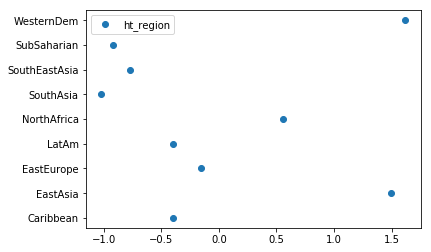

In [36]:
ancilliary_funcs.desafio_5(sorted_df, 'gle_cgdpc', 'ht_region', False, ['z_score'])

## 5. Genere un método que devuelva un gráfico comparandodos curvas de densidad